In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
# import the dataset 
df = sns.load_dataset('titanic')

In [42]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [43]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
# finding missing values 
df.isnull().sum()          # here sum means counting the missing values 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

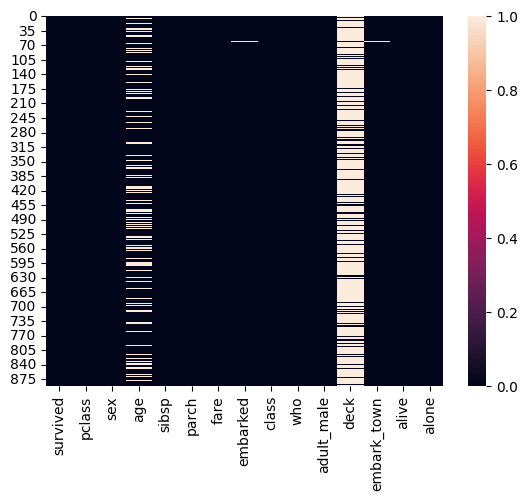

In [45]:
# another way of seeing missng values using heatmap
sns.heatmap(df.isnull())

In [46]:
df.columns   # want to see the names of all columns 

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='str')

In [47]:
df['embark_town'].unique()   

<StringArray>
['Southampton', 'Cherbourg', 'Queenstown', nan]
Length: 4, dtype: str

In [48]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [49]:
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [50]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [51]:
# drop the deck column from dataset, it has 70% has more missing values. 
df.drop('deck', axis= 1, inplace= True)  ## inplace means bring this change in the dataset

In [52]:
df.columns    # in the output the deck column has been dropped

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='str')

In [53]:
# the age coloumns has also missing values but it less than 70%, so we will impute it with mean, median or mode
df['age'] = df['age'].fillna(df['age'].mean())

In [54]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [55]:
# again fill the missing values with mode or median in the embarked and embarked_town column
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

<Axes: >

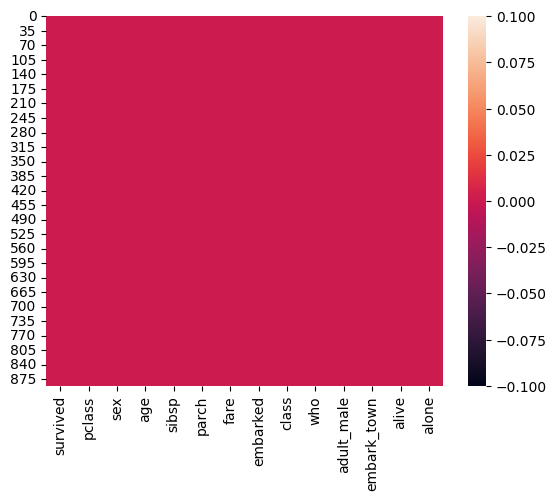

In [56]:
# All the missing values are filled
sns.heatmap(df.isnull())

<Axes: xlabel='age', ylabel='Count'>

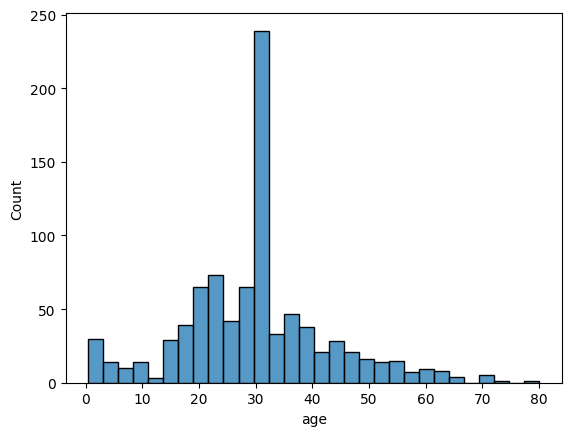

In [57]:
# age columns has lot of continous values that may confuse the model, in this case we do binning.
sns.histplot(df['age'])

In [58]:
# Binning of age columns into 7 categoties
bins = [0, 1, 5, 12, 18, 30, 50, 80]
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Young', 'Middle Aged', "Old"]
pd.cut(df['age'], bins=bins, labels= labels)



0            Young
1      Middle Aged
2            Young
3      Middle Aged
4      Middle Aged
          ...     
886          Young
887          Young
888          Young
889          Young
890    Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, str): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Young' < 'Middle Aged' < 'Old']

# feature engineering

In [60]:
# add the binning column into new column name binned-age
bins = [0, 1, 5, 12, 18, 30, 50, 80]
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Young', 'Middle Aged', "Old"]
df['binned_age']= pd.cut(df['age'], bins=bins, labels= labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [61]:
df['binned_age'].value_counts()

binned_age
Young          447
Middle Aged    241
Teens           70
Old             64
Toddlers        30
Kids            25
Infants         14
Name: count, dtype: int64